In [1]:
import sys;sys.path.append('../')
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

D:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


(26, 2)

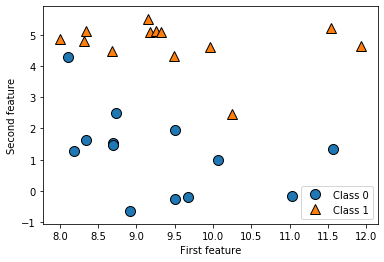

In [2]:
X,y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
X.shape

Text(0, 0.5, 'Target')

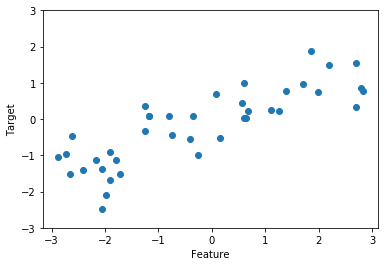

In [3]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
cancer.data.shape

(569, 30)

In [6]:
{n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [9]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.data.shape

(506, 13)

In [10]:
X,y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

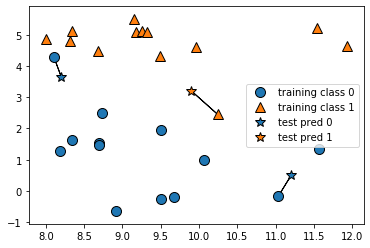

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

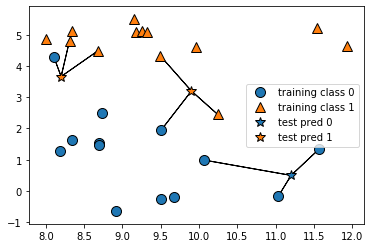

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
clf = KNeighborsClassifier(n_neighbors=3)

In [17]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [19]:
clf.score(X_test,y_test)

0.8571428571428571

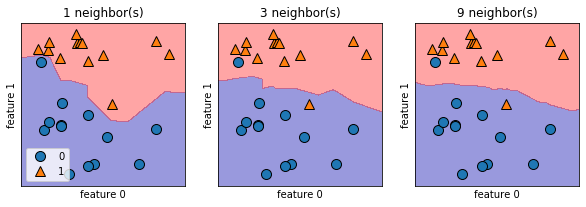

In [20]:
fig,axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors,ax in zip([1,3,9],axes):
    #fit方法返回对象本身，所可以将实例化和拟合放在一行代码中
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [21]:
from sklearn.datasets import load_breast_cancer

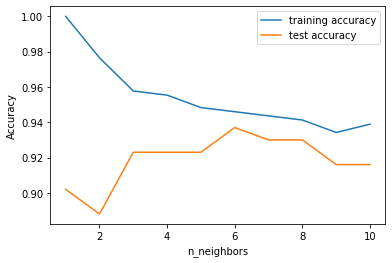

In [22]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #记录训练集精度
    training_accuracy.append(clf.score(X_train,y_train))
    #记录泛化精度
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings,training_accuracy,label='training accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

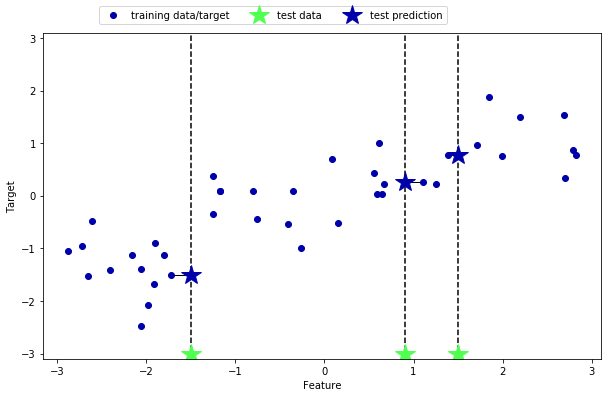

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

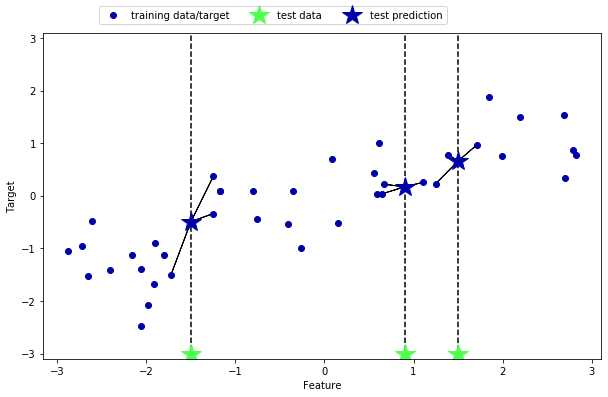

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
X,y = mglearn.datasets.make_wave(n_samples=40)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [27]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [28]:
reg.score(X_test,y_test)

0.8344172446249604

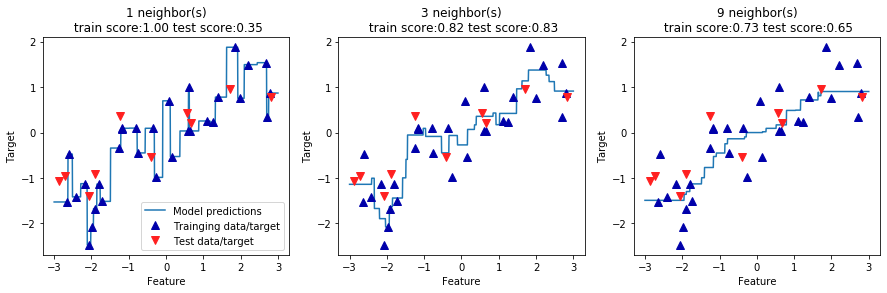

In [29]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    ax.set_title("{} neighbor(s)\n train score:{:.2f} test score:{:.2f}".format(n_neighbors,reg.score(X_train,y_train),
                                                                               reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions","Trainging data/target","Test data/target"],loc="best");

w[0]: 0.393906  b: -0.031804


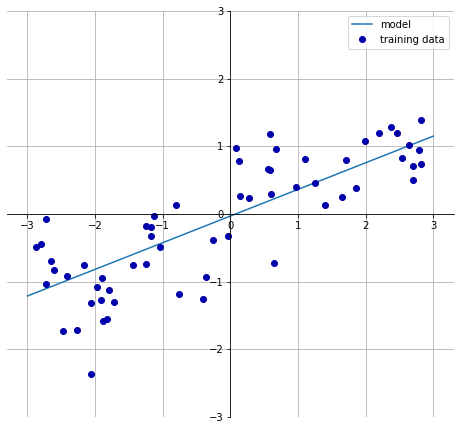

In [30]:
mglearn.plots.plot_linear_regression_wave()

In [31]:
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)

In [32]:
print(lr.coef_)
print(lr.intercept_)

[0.39390555]
-0.031804343026759746


In [33]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.6700890315075756
0.65933685968637


In [34]:
X,y = mglearn.datasets.load_extended_boston()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [35]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9520519609032729
0.6074721959665752


In [36]:
from sklearn.linear_model import Ridge

rigde = Ridge().fit(X_train,y_train)
print(rigde.score(X_train,y_train))
print(rigde.score(X_test,y_test))

0.885796658517094
0.7527683481744755


In [37]:
rigde10 = Ridge(alpha=10).fit(X_train,y_train)
print(rigde10.score(X_train,y_train))
print(rigde10.score(X_test,y_test))

0.7882787115369614
0.635941148917731


In [38]:
rigde01 = Ridge(alpha=0.1).fit(X_train,y_train)
print(rigde01.score(X_train,y_train))
print(rigde01.score(X_test,y_test))

0.9282273685001985
0.772206793647982


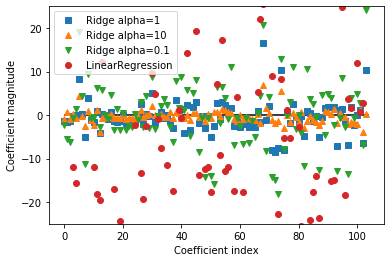

In [39]:
plt.plot(rigde.coef_,'s',label='Ridge alpha=1')
plt.plot(rigde10.coef_,'^',label='Ridge alpha=10')
plt.plot(rigde01.coef_,'v',label='Ridge alpha=0.1')

plt.plot(lr.coef_,'o',label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend();

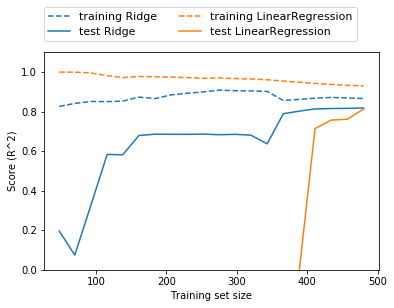

In [40]:
mglearn.plots.plot_ridge_n_samples()

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lasso = Lasso().fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))
print(np.sum(lasso.coef_ != 0))

0.29323768991114607
0.20937503255272294
4


In [43]:
lasso001 = Lasso(alpha=.01,max_iter=100000).fit(X_train,y_train)
print(lasso001.score(X_train,y_train))
print(lasso001.score(X_test,y_test))
print(np.sum(lasso001.coef_ != 0))

0.8962226511086497
0.7656571174549983
33


In [44]:
lasso00001 = Lasso(alpha=.0001,max_iter=100000).fit(X_train,y_train)
print(lasso00001.score(X_train,y_train))
print(lasso00001.score(X_test,y_test))
print(np.sum(lasso00001.coef_ != 0))

0.9507158754515467
0.6437467421272709
96


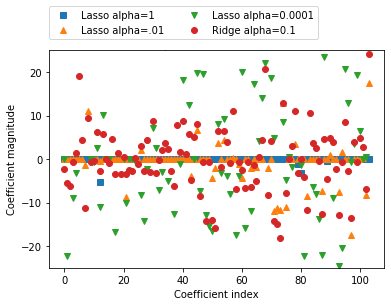

In [45]:
plt.plot(lasso.coef_,'s',label='Lasso alpha=1')
plt.plot(lasso001.coef_,'^',label='Lasso alpha=.01')
plt.plot(lasso00001.coef_,'v',label='Lasso alpha=0.0001')

plt.plot(rigde01.coef_,'o',label='Ridge alpha=0.1')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.ylim(-25,25)
plt.legend(ncol=2,loc=(0,1.05));

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


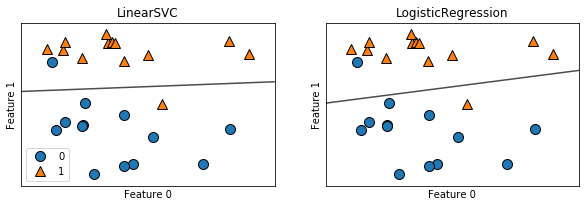

In [47]:
X,y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize=(10,3))

for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend();

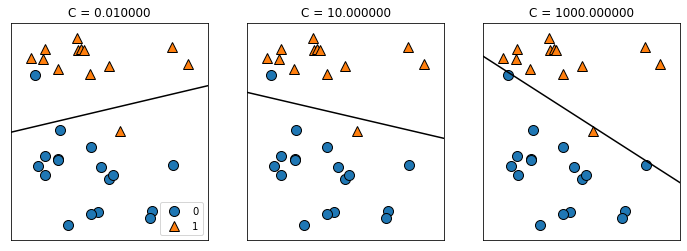

In [48]:
mglearn.plots.plot_linear_svc_regularization()

In [49]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.9553990610328639
0.958041958041958


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print(logreg100.score(X_train,y_train))
print(logreg100.score(X_test,y_test))

0.971830985915493
0.965034965034965


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
logreg001 = LogisticRegression(C=.01).fit(X_train,y_train)
print(logreg001.score(X_train,y_train))
print(logreg001.score(X_test,y_test))

0.9342723004694836
0.9300699300699301


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


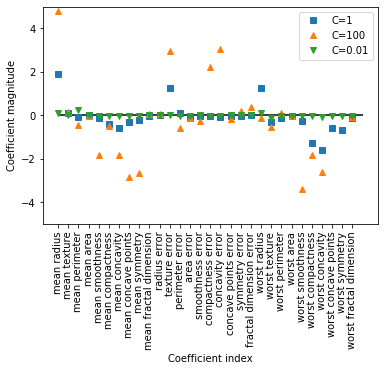

In [52]:
plt.plot(logreg.coef_.T,'s',label='C=1')
plt.plot(logreg100.coef_.T,'^',label='C=100')
plt.plot(logreg001.coef_.T,'v',label='C=0.01')

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.ylim(-5,5)
plt.legend();

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9131455399061033
0.9230769230769231
0.960093896713615
0.958041958041958
0.9859154929577465
0.9790209790209791


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


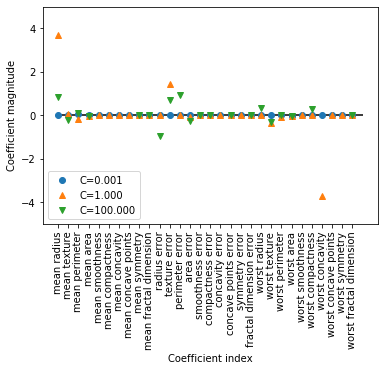

In [53]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C,penalty='l1').fit(X_train,y_train)
    print(lr_l1.score(X_train,y_train))
    print(lr_l1.score(X_test,y_test))
    plt.plot(lr_l1.coef_.T,marker,label='C={:.3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.ylim(-5,5)
plt.legend(loc=3);

In [54]:
logreg.coef_.shape

(1, 30)

In [55]:
from sklearn.datasets import make_blobs

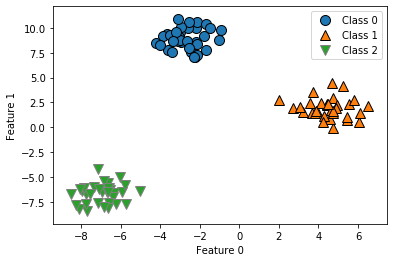

In [56]:
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"]);

In [57]:
linear_svm = LinearSVC().fit(X,y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


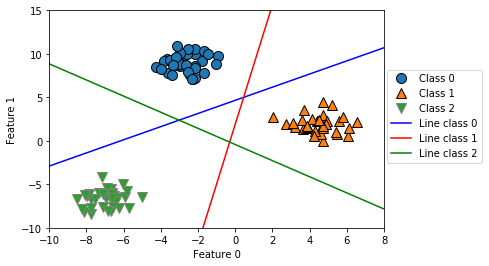

In [58]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line * coef[0] + intercept) / coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3));

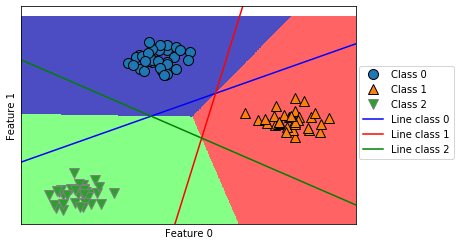

In [59]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line * coef[0] + intercept) / coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3));

In [60]:
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y = np.array([0,1,0,1])

In [61]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print(counts)

{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


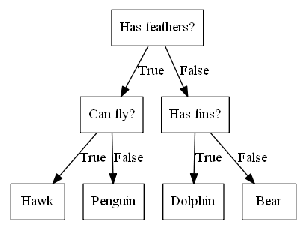

In [62]:
mglearn.plots.plot_animal_tree()

In [63]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

1.0
0.9370629370629371


In [64]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

0.9882629107981221
0.951048951048951


In [65]:
from sklearn.tree import export_graphviz

In [66]:
export_graphviz(tree,out_file='tree.dot',class_names=["malignant","benign"],
               feature_names=cancer.feature_names,impurity=False,filled=True)

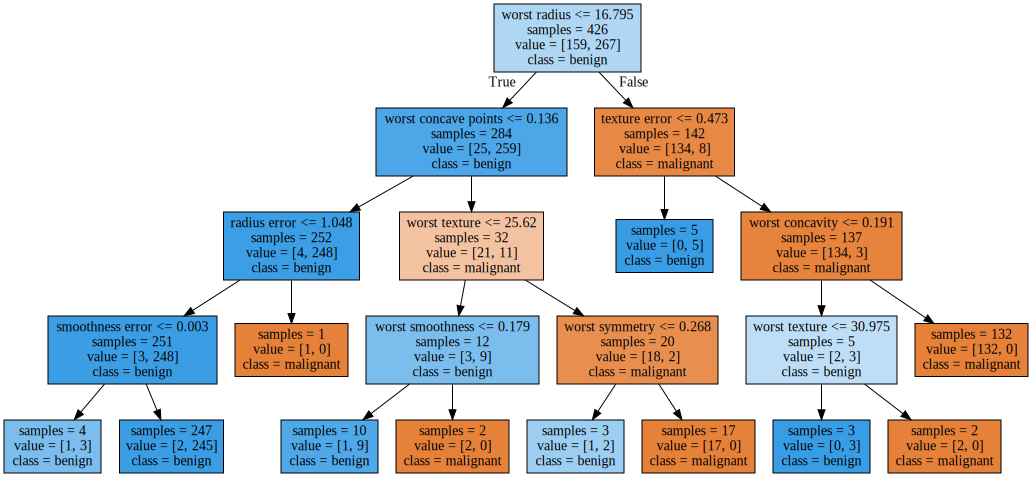

In [67]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [68]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

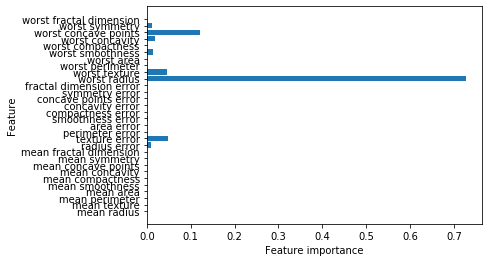

In [69]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


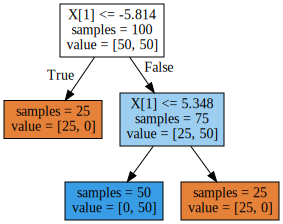

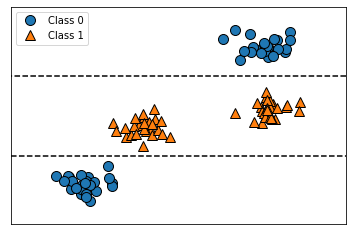

In [70]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

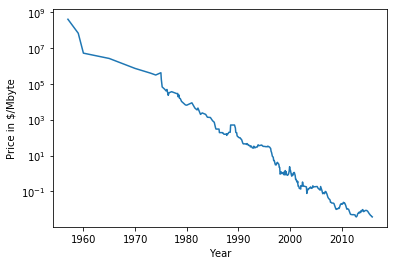

In [72]:
ram_prices = pd.read_csv("../data/ram_price.csv")

plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
#利用历史数据预测2000年后的价格
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]


#基于日期来预测价格
X_train = data_train.date[:,np.newaxis]
#利用对数变换，获得数据和目标之间更简单的关系
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

#对所有数据进行预测
X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#对数变换逆运算
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

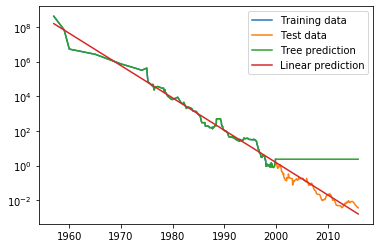

In [77]:
plt.semilogy(data_train.date,data_train.price,label="Training data")
plt.semilogy(data_test.date,data_test.price,label="Test data")
plt.semilogy(ram_prices.date,price_tree,label="Tree prediction")
plt.semilogy(ram_prices.date,price_lr,label="Linear prediction")
plt.legend();